# Reducing Readmission Risk using Predictive Analytics

## Problem

### What is a Readmission?
Admission to a hospital within 30 days of a discharge from the same or another hospital.

### Why is it important?
* Improve patient's health
* Reduce healthcare costs - organizations shelling out billions each year on avoidable episodes

### Hospital Readmissions Reduction Program (HRRP)
* CMS HRRP was introduced in 2012 with readmission reduction into the mind
* CMS has doled out 2.5 billion US dollars in penalties, with an estimated 564 million US dollars in fiscal year 2018 alone, up from the 528 million US dollars in 2017. 

### How to reduce Readmissions?
* Greater than 50% of readmitted patients have no post-discharge contact with healthcare professionals
* Use EHR to identify risk patients and recommend interventions that use minimal resources
* Healthcare providers can work with patients to monitor chronic conditions from their homes use mobile apps:
    
    * patient data, such as body weight or blood glucose levels
    
    * help patients with their post-discharge treatment plans

# Dataset

## Diabetes 130-US hospitals for years 1999-2008 Data Set

URL: https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008

* The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals 
* Over 50 features representing patient and hospital outcomes

![](figures/Data_Information.png)


# Quantitative and visual exploratory data analysis (EDA)

## Understand and prepare data for modeling with no data leakage

* explore features 
* define modeling objectives
* data aggregations to prevent data leakage
* feature engineering and prepare data for modeling
* handle missing/null/zero valued data

## Connect to the dataset

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

We will read in the .csv file using pandas

In [6]:
data_file = "../dataset_diabetes/raw_data/diabetic_data.csv"
df = pd.read_csv(data_file)
print(f"{df.shape[1]} Features\n{df.shape[0]} Observations")

50 Features
101766 Observations


We wil use .sample() method to visualize the table. Other methods include .head() and .tail()

In [7]:
df.sample(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
21850,75773994,6798231,Caucasian,Male,[50-60),?,1,1,7,8,?,?,57,0,21,0,0,2,427,428,596,9,None,None,Steady,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO
4571,25557750,3148857,Caucasian,Male,[0-10),?,2,1,1,3,?,Pediatrics-Endocrinology,12,0,4,0,0,0,250.03,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
25595,85342104,28320345,Caucasian,Female,[90-100),[50-75),1,3,6,8,?,?,56,1,16,0,0,0,440,681,707,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30
55903,161031522,94160412,Caucasian,Female,[80-90),?,2,1,7,2,SP,Surgery-General,49,0,18,0,0,1,398,396,428,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
72607,212779206,33073200,Caucasian,Female,[70-80),[75-100),2,1,1,1,MC,Cardiology,66,3,10,3,0,0,414,411,428,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30


# Demographic Analysis

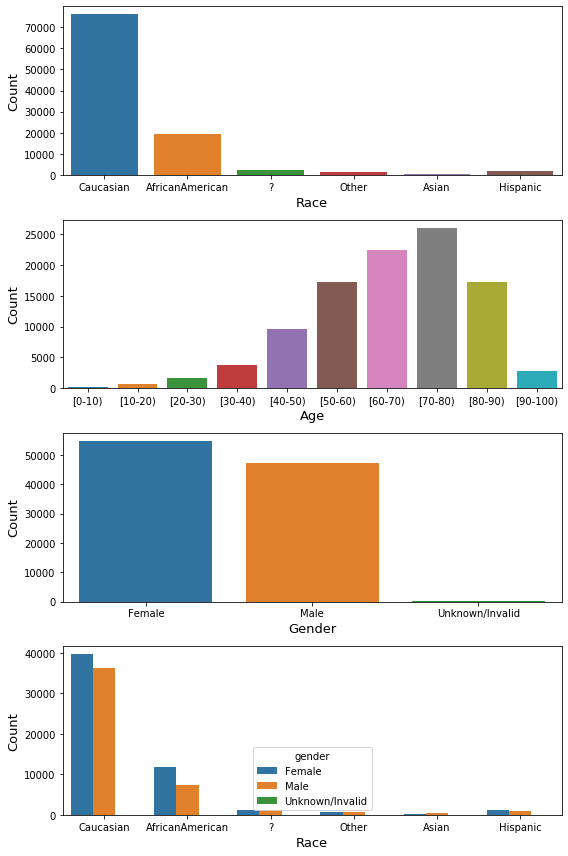

In [8]:
plt.figure(figsize=(8,12))

plt.subplot(4,1,1)
sns.countplot(df['race'])
plt.xlabel("Race", fontsize=13)
plt.ylabel("Count", fontsize=13)

plt.subplot(4,1,2)
sns.countplot(df['age'])
plt.xlabel("Age", fontsize=13)
plt.ylabel("Count", fontsize=13)

plt.subplot(4,1,3)
sns.countplot(df['gender'])
plt.xlabel("Gender", fontsize=13)
plt.ylabel("Count", fontsize=13)

plt.subplot(4,1,4)
sns.countplot(df['race'], hue=df["gender"])
plt.xlabel("Race", fontsize=13)
plt.ylabel("Count", fontsize=13)

plt.tight_layout()

## Summary I - Demographic Info

    * Caucasian population is the most predominant group
    * There is almost an equal representation of the male and female population
    * Majority of the patients are 40 - 90 years old, 70-80 years age group being the predominant group 

# Removing unwanted observations

![](figures/EHR_levels.png)

## Determine the level of this dataset

**Total unique encounters = total number observations in original full dataset**

In [9]:
# Line test
try:
    assert len(df) > df['encounter_id'].nunique()
    print("The dataset is at LINE LEVEL")
except:
    print("This dataset is not at LINE LEVEL")

This dataset is not at LINE LEVEL


In [10]:
# Encounter Test
try:
    assert len(df) == df['encounter_id'].nunique()
    print(f"The dataset is at the ENCOUNTER LEVEL with {len(df)} observations and unique encounters")
except:
    print("The dataset is NOT at the ENCOUNTER LEVEL")


The dataset is at the ENCOUNTER LEVEL with 101766 observations and unique encounters


In [11]:
print(f"{df['patient_nbr'].nunique()} Unique Patients in the dataset")

71518 Unique Patients in the dataset


## Count the number encounters for each patient

In [12]:
df['number_encounters'] = df.groupby("patient_nbr")["encounter_id"].transform("count")
df.sort_values(["number_encounters"], ascending=False)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,number_encounters
78355,239153370,88785891,Caucasian,Female,[20-30),?,1,1,7,7,OG,Emergency/Trauma,74,0,24,0,4,9,250.13,305,276,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30,40
76907,232655340,88785891,Caucasian,Female,[20-30),?,2,1,7,4,OG,Surgery-General,50,0,23,0,4,11,789,787,250,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30,40
87854,281267754,88785891,Caucasian,Female,[20-30),?,1,1,7,7,OG,Emergency/Trauma,63,1,20,2,3,11,250.11,305,V15,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30,40
91444,309563132,88785891,Caucasian,Female,[20-30),?,1,1,7,3,OG,Emergency/Trauma,9,0,10,2,4,12,787,305,305,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30,40
88392,284109186,88785891,Caucasian,Female,[20-30),?,1,1,7,3,OG,Emergency/Trauma,63,0,15,2,3,12,250.11,276,276,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41403,128083350,23792328,AfricanAmerican,Female,[50-60),?,3,1,1,2,BC,Surgery-General,40,1,30,0,1,0,278,401,250,4,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,1
41404,128092554,23277078,Caucasian,Female,[40-50),?,3,1,1,1,BC,Anesthesiology,21,2,23,0,0,0,722,724,V45,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,1
41405,128108976,97821405,Caucasian,Female,[60-70),?,3,1,1,2,?,?,26,2,7,0,0,0,198,196,174,9,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30,1
41408,128115234,42905664,Caucasian,Male,[60-70),?,3,1,1,2,CH,?,10,1,6,0,0,0,274,584,716,4,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,1


Text(0.5, 1.0, 'Number of encounter per patient')

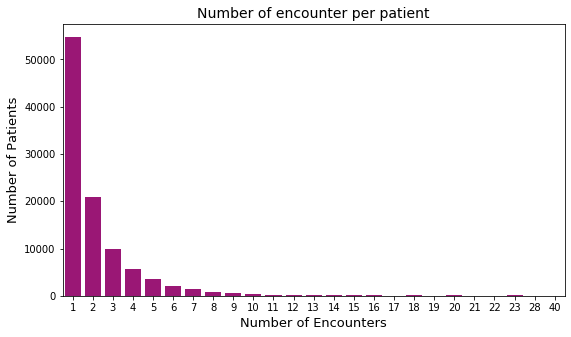

In [13]:
plt.figure(figsize=(9,5))
sns.countplot(df['number_encounters'], color='#B0017F')
plt.xlabel("Number of Encounters", fontsize=13)
plt.ylabel("Number of Patients", fontsize=13)
plt.title("Number of encounter per patient", fontsize=14)

## Select only one encounter for every patient

### Select the first encounter
**Choices**: 
    * First Encounter - More Readmission Encounters
    * Last Encounter - Fewer Readmission Encounters
    * Any Encounter 

In [14]:
#%%writefile -a utils.py
def select_first_encounter(df):
    '''
    df: pandas dataframe, dataframe with all encounters
    return:
        - first_encounter_df: pandas dataframe, dataframe with only the first encounter for a given patient
    '''
    first_encounter = df.sort_values(["encounter_id", "patient_nbr"], ascending=[True, True]). \
                            groupby("patient_nbr").head(1).reset_index(drop=True)
    return first_encounter

In [15]:
print(f"Shape of the original dataset: {df.shape}")
first_encounter = select_first_encounter(df)

assert first_encounter["patient_nbr"].nunique() == df["patient_nbr"].nunique()
print(f"Shape of the first encounter dataset: {first_encounter.shape}")

Shape of the original dataset: (101766, 51)
Shape of the first encounter dataset: (71518, 51)


### Drop the number_encounters column we just created - Data Leakage

In [16]:
first_encounter.drop("number_encounters", axis=1, inplace=True)

## Remove patients who cannot be readmitted

### Discharged Disposition ID
* 11	Expired
* 19	Expired at home. Medicaid only, hospice.
* 20	Expired in a medical facility. Medicaid only, ...
* 21	Expired, place unknown. Medicaid only, hospice.

### Filter out dead patients

In [17]:
dead_patients = first_encounter[first_encounter['discharge_disposition_id'].isin([11, 19, 20, 21])]
print(f"{len(dead_patients)} in the first encounter dataset")

df = first_encounter[~first_encounter['discharge_disposition_id'].isin([11, 19, 20, 21])]

assert len(df) == len(first_encounter) - len(dead_patients)

print(f"{first_encounter.shape[0]} Observations before cleaning dead patients")
print(f"{df.shape[0]} Observations after cleaning dead patients")

1084 in the first encounter dataset
71518 Observations before cleaning dead patients
70434 Observations after cleaning dead patients


## Summary II - Removing unwanted observations
    * Selected only one encounter per patient
    * Removed information about patients who expired

# Feature Transformation and Engineering

## Target - Readmitted

In [18]:
df["readmitted"].value_counts()

NO     41901
>30    22240
<30     6293
Name: readmitted, dtype: int64

### Label encode the strings in the target variable

In [19]:
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)
df['readmitted'].value_counts()

0    64141
1     6293
Name: readmitted, dtype: int64

### Compute Prevelance

In [20]:
#%%writefile -a utils.py
def compute_prevelance(df, col):
    """
    Count number of occurrences of each value in array.
    Args:
        df - DataFrame
        col - array
    Returns
        prevelance

    """
    neg, pos = np.bincount(df[col])
    prevelance = 100 * pos / (neg + pos)
    return prevelance

In [21]:
total_ds_prevelance = compute_prevelance(df, 'readmitted')
print(f"Prevelance in the entire dataset: {np.round(total_ds_prevelance, 2)}%")

Prevelance in the entire dataset: 8.93%


In [22]:
df.to_csv("first_encounter_df.csv", index=False)

In [23]:
df = pd.read_csv("first_encounter_df.csv")
df.sample(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
37190,149675904,64941885,AfricanAmerican,Male,[50-60),?,1,1,7,5,BC,?,45,0,24,0,0,0,403,584,250.4,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0
8961,46701978,23379984,Caucasian,Female,[70-80),?,1,6,17,4,?,?,17,0,16,1,0,0,428,424,482,8,Norm,None,No,No,No,No,No,No,No,Down,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0
7888,42247548,602775,Caucasian,Female,[50-60),?,1,1,7,1,?,Surgery-General,34,1,6,0,0,0,540,250,401,3,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
32270,132673770,43417926,Caucasian,Female,[50-60),?,3,1,1,10,MD,Cardiology,39,4,24,1,0,0,403,394,496,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
55793,237637344,36709371,Caucasian,Female,[70-80),?,6,1,17,5,?,InternalMedicine,65,6,27,1,0,0,349,496,403,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0


## Missing Data

### Function to summarize missing data info. in a dataset

In [24]:
#%%writefile -a utils.py
def check_null_values(df):
    """
    Computes the number of missing observations and percent of missing values
    Arg:
        df: dataframe
    Returns
        Dataframe with: column_name | number_missing_values | percent_missing_values
        
    """
    null_df = pd.DataFrame({"num_missing_obs": df.isna().sum(),
                            "percent_missing_obs": 100 * df.isna().sum() / len(df)
                           }) \
                            .sort_values(by="percent_missing_obs", ascending=False)
    return null_df

In [25]:
df.sample(1)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
5271,31671540,118188,AfricanAmerican,Male,[60-70),?,2,6,4,4,?,?,55,5,36,0,0,0,414,411,401,6,None,None,Steady,No,No,No,No,No,Steady,Steady,No,Steady,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0


### Replace '?' with np.nan

In [26]:
df.replace({"?": np.nan}, inplace=True)
df.sample(1)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
34409,141319098,23741541,Caucasian,Male,[70-80),NaN,1,1,7,3,MC,InternalMedicine,44,1,22,0,1,0,428,276,424,9,None,None,No,No,Steady,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1


### Compute missingness in the first_encounter dataset

In [27]:
check_null_values(df)

,num_missing_obs,percent_missing_obs
weight,67620,96.004770
medical_specialty,33937,48.182696
payer_code,30552,43.376778
race,1921,2.727376
diag_3,1225,1.739217
diag_2,294,0.417412
diag_1,11,0.015617
encounter_id,0,0.000000
tolazamide,0,0.000000
glyburide,0,0.000000


## Split data into categorical and numeric data


![](figures/Data_Cleaning_3.png)

### Numeric Data

In [28]:
numeric_data = df.select_dtypes(exclude='object')
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70434 entries, 0 to 70433
Data columns (total 14 columns):
encounter_id                70434 non-null int64
patient_nbr                 70434 non-null int64
admission_type_id           70434 non-null int64
discharge_disposition_id    70434 non-null int64
admission_source_id         70434 non-null int64
time_in_hospital            70434 non-null int64
num_lab_procedures          70434 non-null int64
num_procedures              70434 non-null int64
num_medications             70434 non-null int64
number_outpatient           70434 non-null int64
number_emergency            70434 non-null int64
number_inpatient            70434 non-null int64
number_diagnoses            70434 non-null int64
readmitted                  70434 non-null int64
dtypes: int64(14)
memory usage: 7.5 MB


In [29]:
subset_numeric_data = numeric_data[['number_diagnoses', 'num_lab_procedures', 
                                      'time_in_hospital','num_medications',
                                     'num_procedures','number_inpatient', 
                                      'number_outpatient', 'number_emergency']]

In [30]:
subset_numeric_data_a = numeric_data[['number_diagnoses', 'num_lab_procedures', 
                                      'time_in_hospital','num_medications']]

In [31]:
subset_numeric_data_b = numeric_data[['num_procedures','number_inpatient', 
                                      'number_outpatient', 'number_emergency']]

### Numeric Columns

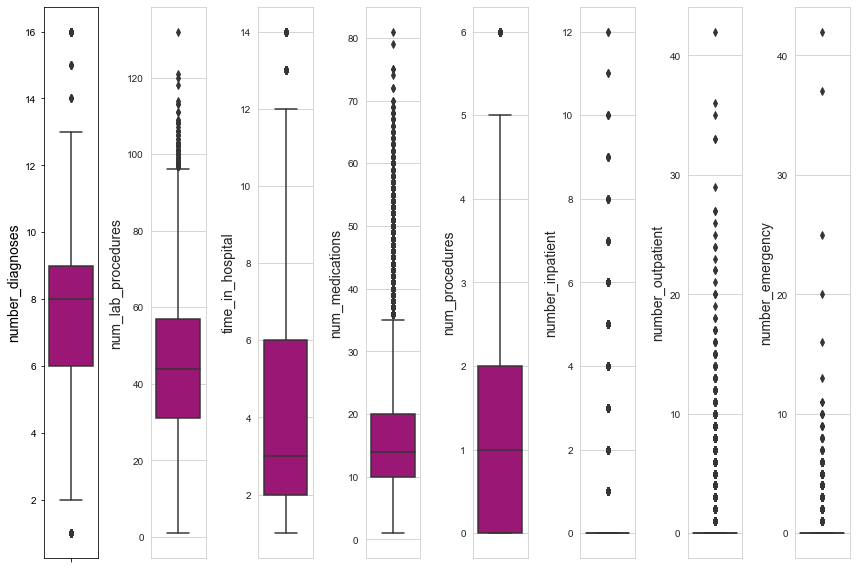

In [32]:
l = subset_numeric_data.columns.values
number_of_columns = 8
number_of_rows = len(l)-1/number_of_columns

plt.figure(figsize=(1.5* number_of_columns,8*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1, number_of_columns, i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='#B0017F',orient='v')
    plt.ylabel(f"{l[i]}", fontsize=14)
    plt.tight_layout()

### Plot the distribution of each numeric feature
* **Histograms**
* **Empirical CDFs**

4it [00:01,  2.07it/s]


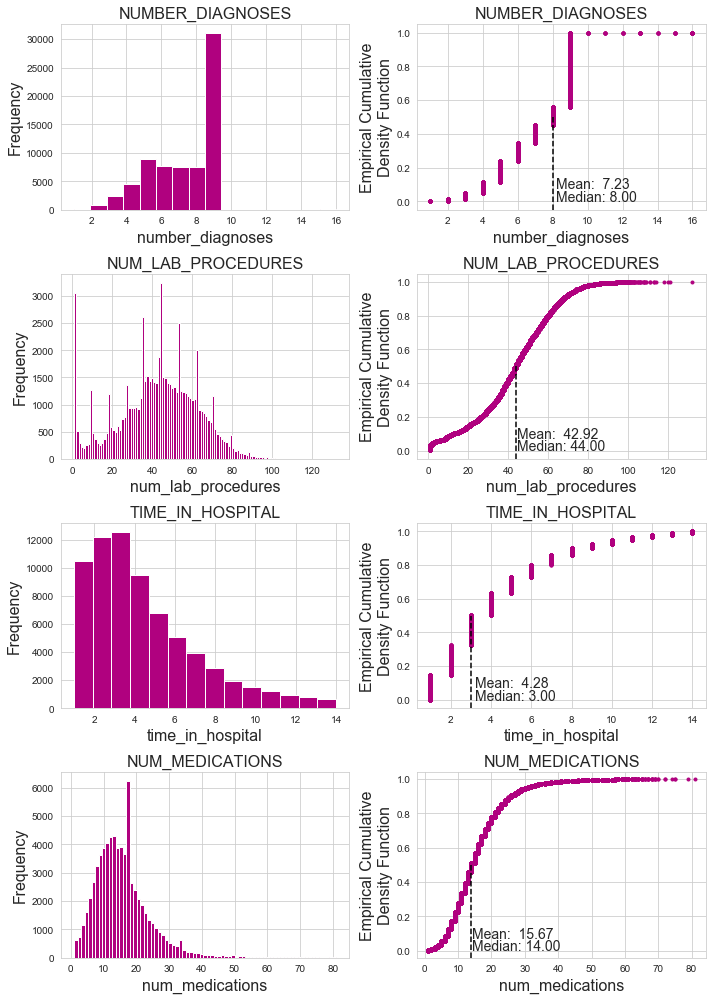

In [33]:
l_a = subset_numeric_data_a.columns.values

fig, axes = plt.subplots(nrows=len(l_a), ncols=2, figsize=(10,14))

for idx, col in tqdm(enumerate(l_a)):
    N = len(numeric_data[col])
    x_ = np.sort(numeric_data[col])
    y_ = np.arange(1, N+1)/N
    median = np.median(x_)
    mean = np.mean(x_)
    
    # Plot histogram
    axes[idx,0].hist(numeric_data[col], bins = numeric_data[col].nunique(), color = '#B0017F')
    axes[idx,0].set_xlabel(col, fontsize=16)
    axes[idx,0].set_ylabel("Frequency", fontsize=16)
    axes[idx,0].set_title(col.upper(), fontsize=16)

    # Plot ECDF
    axes[idx,1].plot(x_, y_, marker=".", linestyle='none', color = '#B0017F')
    axes[idx,1].set_xlabel(col, fontsize=16)
    axes[idx,1].set_ylabel("Empirical Cumulative\nDensity Function", fontsize=16)
    axes[idx,1].set_title(col.upper(), fontsize=16)
    axes[idx,1].axvline(median, 0, 0.5, color='black', linestyle="--")
    axes[idx,1].text(median + 0.2, 0.0,  "Median: {:.2f}".format(median), fontsize=14)
    axes[idx,1].text(median + 0.2, 0.075, "Mean:  {:.2f}".format(mean), fontsize=14)

    plt.margins(0.04)  
    plt.tight_layout()

4it [00:01,  2.09it/s]


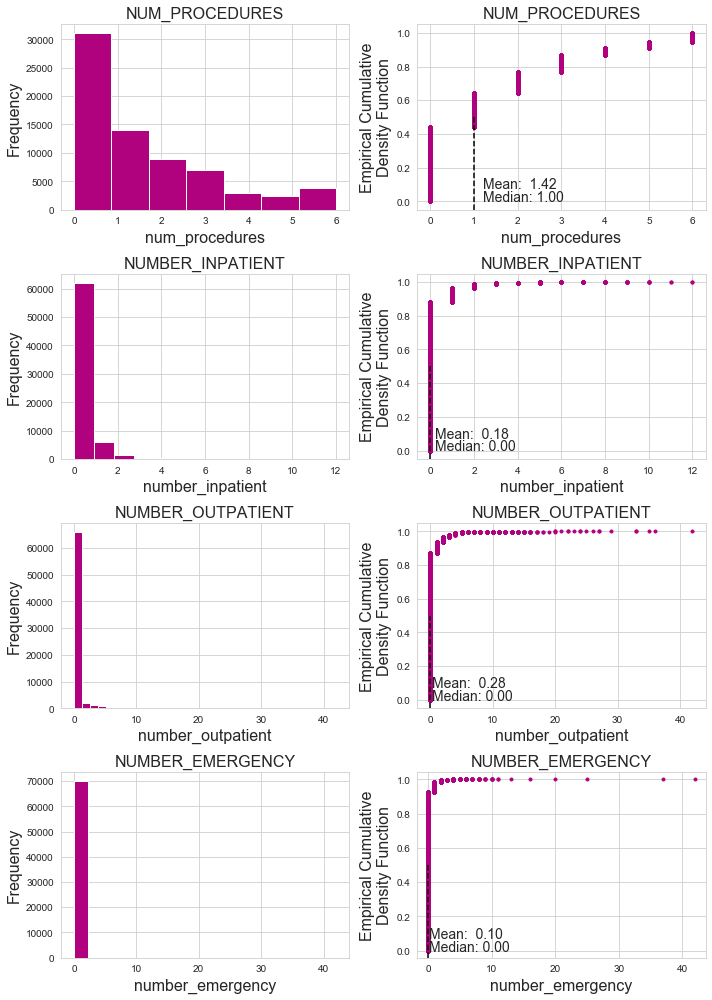

In [34]:
l_b = subset_numeric_data_b.columns.values

fig, axes = plt.subplots(nrows=len(l_b), ncols=2, figsize=(10,14))

for idx, col in tqdm(enumerate(l_b)):
    N = len(numeric_data[col])
    x_ = np.sort(numeric_data[col])
    y_ = np.arange(1, N+1)/N
    median = np.median(x_)
    mean = np.mean(x_)
    
    # Plot histogram
    axes[idx,0].hist(numeric_data[col], bins = numeric_data[col].nunique(), color = '#B0017F')
    axes[idx,0].set_xlabel(col, fontsize=16)
    axes[idx,0].set_ylabel("Frequency", fontsize=16)
    axes[idx,0].set_title(col.upper(), fontsize=16)

    # Plot ECDF
    axes[idx,1].plot(x_, y_, marker=".", linestyle='none', color = '#B0017F')
    axes[idx,1].set_xlabel(col, fontsize=16)
    axes[idx,1].set_ylabel("Empirical Cumulative\nDensity Function", fontsize=16)
    axes[idx,1].set_title(col.upper(), fontsize=16)
    axes[idx,1].axvline(median, 0, 0.5, color='black', linestyle="--")
    axes[idx,1].text(median + 0.2, 0.0,  "Median: {:.2f}".format(median), fontsize=14)
    axes[idx,1].text(median + 0.2, 0.075, "Mean:  {:.2f}".format(mean), fontsize=14)

    plt.margins(0.04)  
    plt.tight_layout()

### Normalization

GOAL: Transform features to be on a similar scale

### Normalization Techniques at a Glance

**CLIPPING** - caps all feature values above (or below) a certain value
* 'num_medications'
* 'num_lab_procedures'
* 'number_diagnoses'

**LOG_SCALING** - compress a wide range to a narrow range
* 'number_inpatient'
* 'number_outpatient'
* 'number_emergency'

**Z_SCORE**
All features will be standardized using the Z-score

### Clipping

In [35]:
#%%writefile -a utils.py
def compute_mean_std(df, col):
    """
    Computes mean and standard deviation of an array 
    Args: df - dataframe
         col - column
    """
    mean = np.mean(df[col])
    stddev = np.std(df[col])
    return mean, stddev

def compute_cutoff(df, col):
    """
    Computes lower threshold - 3 standard deviations below mean
             upper threshold - 3 standard deviations above mean
             
    Args: df - dataframe
         col - column
    Returns: lower_cutoff, upper_cutoff
    """
        
    mean, std = compute_mean_std(df, col)
    upper_cutoff = mean + 3*std 
    lower_cutoff = mean - 3*std
    return round(lower_cutoff), round(upper_cutoff)
    

In [36]:
# number_diagnoses
number_diagnoses_lower_cutoff, number_diagnoses_upper_cutoff  = compute_cutoff(numeric_data, 'number_diagnoses')
print(f"Number_diagnoses: \nlower_cutoff: {number_diagnoses_lower_cutoff}, upper_cutoff: {number_diagnoses_upper_cutoff}")
print()

# num_lab_procedures
num_lab_procedures_lower_cutoff, num_lab_procedures_upper_cutoff = compute_cutoff(numeric_data, 'num_lab_procedures')
print(f"Number of lab procedures: \nlower_cutoff: {num_lab_procedures_lower_cutoff}, upper_cutoff: {num_lab_procedures_upper_cutoff}")
print()

# num_procedures
num_medications_lower_cutoff, num_medications_upper_cutoff = compute_cutoff(numeric_data, 'num_medications')
print(f"Number of medications: \nlower_cutoff: {num_medications_lower_cutoff}, upper_cutoff: {num_medications_upper_cutoff}")
print()

Number_diagnoses: 
lower_cutoff: 1, upper_cutoff: 13

Number of lab procedures: 
lower_cutoff: -17, upper_cutoff: 103

Number of medications: 
lower_cutoff: -9, upper_cutoff: 41



In [37]:
### Clipping
numeric_data["number_diagnoses_c"] = numeric_data["number_diagnoses"].apply(lambda x: 13 if x>=13 else x)
numeric_data["num_lab_procedures_c"] = numeric_data["num_lab_procedures"].apply(lambda x: 103 if x>=103 else x)
numeric_data["num_medications_c"] = numeric_data["num_medications"].apply(lambda x: 40 if x>=40 else x)

6it [00:01,  4.24it/s]


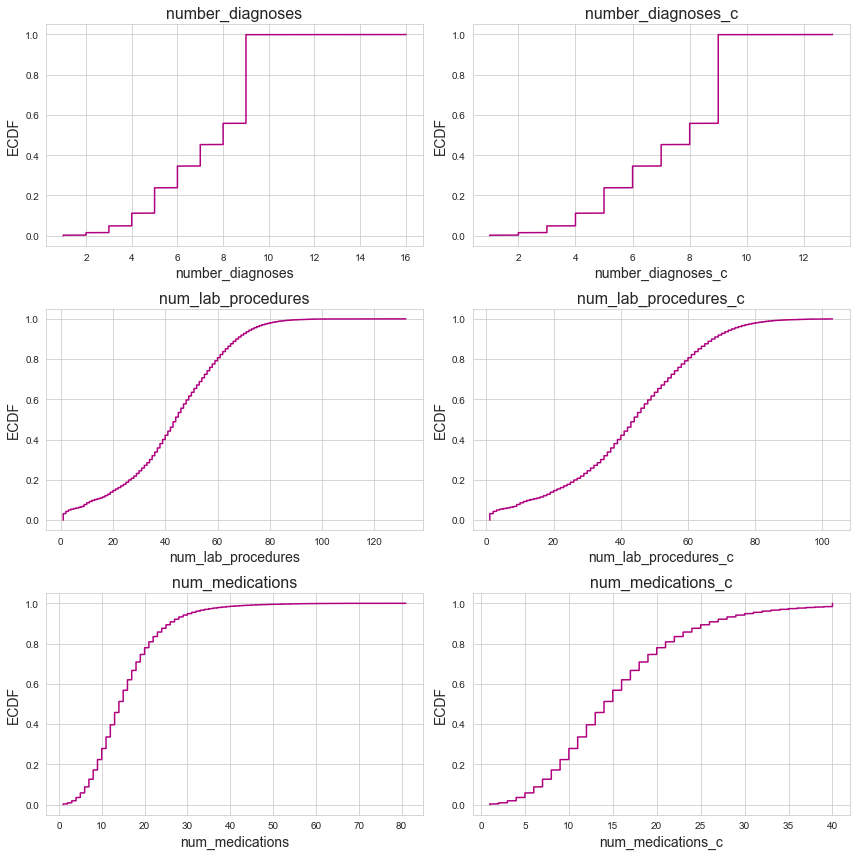

In [38]:
data_c = numeric_data[["number_diagnoses", "number_diagnoses_c", "num_lab_procedures", "num_lab_procedures_c", "num_medications", "num_medications_c"]]
c = data_c.columns.values
fig = plt.figure(figsize=(12,12))
        
for idx, col in tqdm(enumerate(c)):
    N = len(data_c [col])
    x_ = np.sort(data_c [col])
    y_ = np.arange(1, N+1)/N

    plt.subplot(3, 2, idx+1)
    plt.plot(x_, y_, color='#B0017F')
    plt.ylabel("ECDF", fontsize=14)
    plt.xlabel(c[idx], fontsize=14)
    plt.title(c[idx], fontsize=16)
    plt.tight_layout()

### Log Transformations

In [39]:
# Log Transformations
numeric_data['log_number_inpatient'] = np.log1p(numeric_data['number_inpatient'])
numeric_data['log_number_outpatient'] = np.log1p(numeric_data['number_outpatient'])
numeric_data['log_number_emergency'] = np.log1p(numeric_data['number_emergency'])

6it [00:01,  4.30it/s]


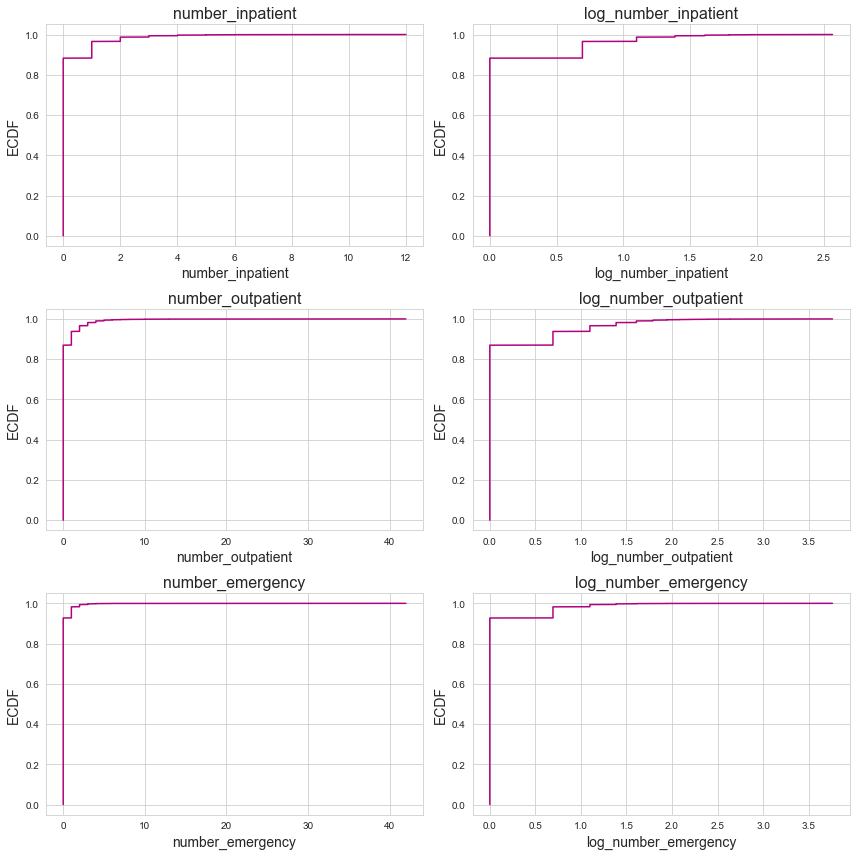

In [40]:
data_l = numeric_data[['number_inpatient', 'log_number_inpatient', 'number_outpatient', 
                       'log_number_outpatient', 'number_emergency', 'log_number_emergency']]
l = data_l.columns.values
fig = plt.figure(figsize=(12,12))
        
for idx, col in tqdm(enumerate(l)):
    N = len(data_l [col])
    x_ = np.sort(data_l [col])
    y_ = np.arange(1, N+1)/N

    plt.subplot(3, 2, idx+1)
    plt.plot(x_, y_, color='#B0017F')
    plt.ylabel("ECDF", fontsize=14)
    plt.xlabel(l[idx], fontsize=14)
    plt.title(l[idx], fontsize=16)
    plt.tight_layout()

![](figures/log_transformed_plots.png)

### Standard Scaling

In [41]:
#%%writefile -a utils.py
def z_score(df, cols):
    """
    apply the z-score method in Pandas using the .mean() and .std() methods
    Args:
    df - dataframe
    cols - list of columns
    Returns:
    new col on a astandard scale
    drops the original clolumn
    """
    if len(cols) >1:     
    # apply the z-score method
        for col in cols:
            col_name = 'zstd_'+ col
            df[col_name] = (df[col] - df[col].mean()) / df[col].std()
            df.drop(col, axis=1, inplace=True)
    else:
        col_name = 'zstd_'+ col
        df[col_name] = (df[col] - df[col].mean()) / df[col].std()
        df.drop(col, axis=1, inplace=True)
    
    return df[col_name]

In [42]:
z_score(numeric_data, ["number_diagnoses_c", "num_lab_procedures_c", 
                       "num_medications_c", "log_number_inpatient",
                       "log_number_outpatient", "log_number_emergency", 
                       "time_in_hospital", "num_procedures"])

0        0.329298
1        0.899128
2       -0.810361
3        0.329298
4        2.608617
           ...   
70429    0.329298
70430    2.608617
70431    2.608617
70432   -0.240532
70433    0.899128
Name: zstd_num_procedures, Length: 70434, dtype: float64

In [43]:
numeric_data.drop(["admission_type_id", "discharge_disposition_id", "admission_source_id", "num_lab_procedures", "num_medications", "number_outpatient",
                  "number_emergency", "number_inpatient", "number_diagnoses"], axis=1, inplace=True)

In [44]:
numeric_data.columns.values

array(['encounter_id', 'patient_nbr', 'readmitted',
       'zstd_number_diagnoses_c', 'zstd_num_lab_procedures_c',
       'zstd_num_medications_c', 'zstd_log_number_inpatient',
       'zstd_log_number_outpatient', 'zstd_log_number_emergency',
       'zstd_time_in_hospital', 'zstd_num_procedures'], dtype=object)

In [45]:
subset_numeric_data = numeric_data[['zstd_number_diagnoses_c', 'zstd_num_lab_procedures_c',
       'zstd_num_medications_c', 'zstd_log_number_inpatient',
       'zstd_log_number_outpatient', 'zstd_log_number_emergency',
       'zstd_time_in_hospital', 'zstd_num_procedures']]

8it [00:06,  1.22it/s]


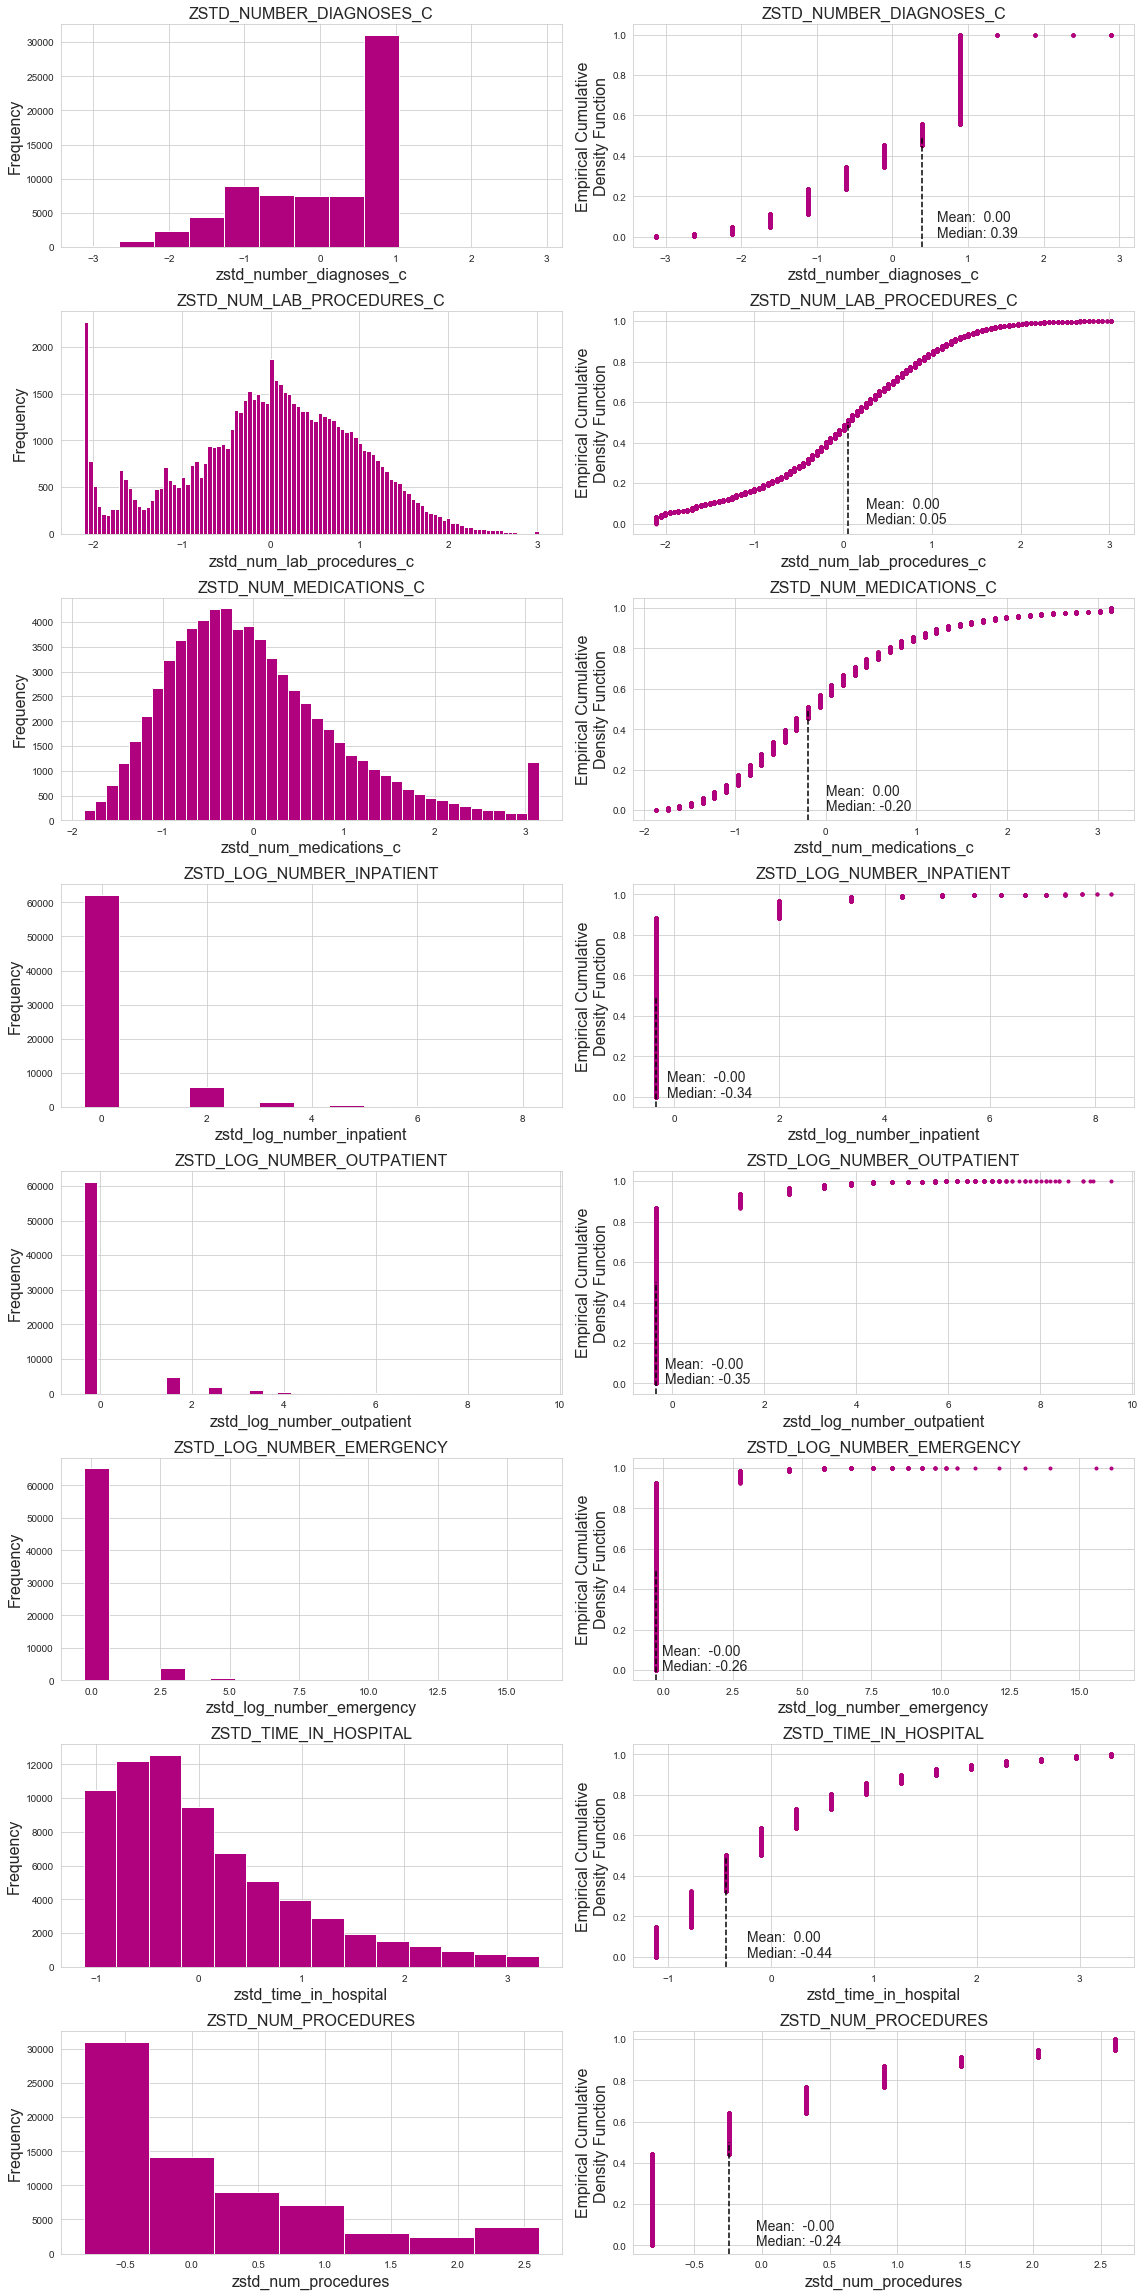

In [46]:
l = subset_numeric_data.columns.values

fig, axes = plt.subplots(nrows=len(l), ncols=2, figsize=(16,32))

for idx, col in tqdm(enumerate(l)):
    N = len(numeric_data[col])
    x_ = np.sort(numeric_data[col])
    y_ = np.arange(1, N+1)/N
    median = np.median(x_)
    mean = np.mean(x_)
    
    # Plot histogram
    axes[idx,0].hist(numeric_data[col], bins = numeric_data[col].nunique(), color = '#B0017F')
    axes[idx,0].set_xlabel(col, fontsize=16)
    axes[idx,0].set_ylabel("Frequency", fontsize=16)
    axes[idx,0].set_title(col.upper(), fontsize=16)

    # Plot ECDF
    axes[idx,1].plot(x_, y_, marker=".", linestyle='none', color = '#B0017F')
    axes[idx,1].set_xlabel(col, fontsize=16)
    axes[idx,1].set_ylabel("Empirical Cumulative\nDensity Function", fontsize=16)
    axes[idx,1].set_title(col.upper(), fontsize=16)
    axes[idx,1].axvline(median, 0, 0.5, color='black', linestyle="--")
    axes[idx,1].text(median + 0.2, 0.0,  "Median: {:.2f}".format(median), fontsize=14)
    axes[idx,1].text(median + 0.2, 0.075, "Mean:  {:.2f}".format(mean), fontsize=14)

    plt.margins(0.04)  
    plt.tight_layout()

### Check for missing values

In [47]:
check_null_values(numeric_data)

,num_missing_obs,percent_missing_obs
encounter_id,0,0.0
patient_nbr,0,0.0
readmitted,0,0.0
zstd_number_diagnoses_c,0,0.0
zstd_num_lab_procedures_c,0,0.0
zstd_num_medications_c,0,0.0
zstd_log_number_inpatient,0,0.0
zstd_log_number_outpatient,0,0.0
zstd_log_number_emergency,0,0.0
zstd_time_in_hospital,0,0.0


### Summary III - Feature Transformation I
* Converted the target to a binary classification problem
* Normalized the numeric features
    * Features with wide range of values are compressed to a narrow range
    * Features with extreme outliers are clipped
    * Standardized all numeric features with a z-score

## Categorical Data

In [48]:
categorical_data = df.select_dtypes(include='object')
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70434 entries, 0 to 70433
Data columns (total 36 columns):
race                        68513 non-null object
gender                      70434 non-null object
age                         70434 non-null object
weight                      2814 non-null object
payer_code                  39882 non-null object
medical_specialty           36497 non-null object
diag_1                      70423 non-null object
diag_2                      70140 non-null object
diag_3                      69209 non-null object
max_glu_serum               70434 non-null object
A1Cresult                   70434 non-null object
metformin                   70434 non-null object
repaglinide                 70434 non-null object
nateglinide                 70434 non-null object
chlorpropamide              70434 non-null object
glimepiride                 70434 non-null object
acetohexamide               70434 non-null object
glipizide                   70434 non-null

In [49]:
categorical_data.sample(5)

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
54353,Hispanic,Female,[80-90),NaN,MD,Emergency/Trauma,562,285,250,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
19128,Caucasian,Female,[40-50),NaN,HM,InternalMedicine,574,250,493,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
34990,Caucasian,Female,[50-60),NaN,MD,Cardiology,414,413,414,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes
9608,Caucasian,Female,[80-90),NaN,NaN,Cardiology,782,402,250,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
34122,Caucasian,Male,[40-50),NaN,SP,NaN,410,250.02,70,None,None,No,No,No,No,Up,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes


### Check Cardinality

In [50]:
# Split into two slides
cardinality_df = categorical_data.describe().T
cardinality_df.head(3)

,count,unique,top,freq
race,68513,5,Caucasian,52663
gender,70434,3,Female,37468
age,70434,10,[70-80),17889


In [51]:
# Reason why we need this
cardinality_df['1-freq'] = len(categorical_data)- cardinality_df['freq']
cardinality_df.sort_values(by=['unique'], ascending=False)
cardinality_df

,count,unique,top,freq,1-freq
race,68513,5,Caucasian,52663,17771
gender,70434,3,Female,37468,32966
age,70434,10,[70-80),17889,52545
weight,2814,9,[75-100),1180,69254
payer_code,39882,17,MC,20006,50428
medical_specialty,36497,70,InternalMedicine,10707,59727
diag_1,70423,695,414,5213,65221
diag_2,70140,724,250,4999,65435
diag_3,69209,757,250,8998,61436
max_glu_serum,70434,4,None,67049,3385


### Missing values

In [52]:
check_null_values(categorical_data)

,num_missing_obs,percent_missing_obs
weight,67620,96.004770
medical_specialty,33937,48.182696
payer_code,30552,43.376778
race,1921,2.727376
diag_3,1225,1.739217
diag_2,294,0.417412
diag_1,11,0.015617
insulin,0,0.000000
miglitol,0,0.000000
troglitazone,0,0.000000


### Drop features that carry a little information, no information or with a large percent of missing values

In [53]:
cat_cols_2_drop = ["weight", "payer_code", "medical_specialty","examide", "citoglipton", "glimepiride-pioglitazone",
                  'metformin-pioglitazone', 'acetohexamide', 'metformin-rosiglitazone', 'troglitazone',
                  'glipizide-metformin']

In [54]:
categorical_data.drop(cat_cols_2_drop, axis=1, inplace=True)

### Impute the missing values

In [55]:
categorical_data["race"] = categorical_data["race"].fillna("UNK")
categorical_data["diag_1"] = categorical_data["diag_1"].fillna("UNK")
categorical_data["diag_2"] = categorical_data["diag_2"].fillna("UNK")
categorical_data["diag_3"] = categorical_data["diag_3"].fillna("UNK")

In [56]:
check_null_values(categorical_data)

,num_missing_obs,percent_missing_obs
race,0,0.0
glipizide,0,0.0
change,0,0.0
glyburide-metformin,0,0.0
insulin,0,0.0
tolazamide,0,0.0
miglitol,0,0.0
acarbose,0,0.0
rosiglitazone,0,0.0
pioglitazone,0,0.0


### Reduce Dimensionality of of Diagnostic Codes¶


![](figures/ICD_9.png)

In [57]:
#%%writefile -a utils.py
def reduce_diag_dimensionality(dataframe, col):
    """
    reduce the dimensionality of the diagnostic codes by grouping them to one level up
    df - dataframe
    col - diagnostic code column
    returns:
    - grouped col with codes grouped at one level high    
    """
    # 1. pad all codes with zeros at the begining with zfill() upto 3
    dataframe[col] = dataframe[col].str.zfill(3)
    # 2. extract the first two characters and store them into a different column
    new_colname = 'grouped_'+ col
    dataframe[new_colname] = dataframe[col].map(lambda x: x[:2] if type(x) is str else x)
    dataframe.drop(col, axis=1, inplace=True)
    return dataframe

In [58]:
categorical_data = reduce_diag_dimensionality(categorical_data, "diag_1")
categorical_data = reduce_diag_dimensionality(categorical_data, "diag_2")
categorical_data = reduce_diag_dimensionality(categorical_data, "diag_3")

In [59]:
print("-------------------------------------------")
print("|        Codes        |  Number of codes  |")
print("-------------------------------------------")
print("| Original Primary    |         {}       | ".format(df["diag_1"].nunique()))
print("| Original Secondary  |         {}       | ".format(df["diag_2"].nunique()))
print("| Original Teritiary  |         {}       | ".format(df["diag_3"].nunique()))
print("| Grouped Primary     |         {}       | ".format(categorical_data["grouped_diag_1"].nunique()))
print("| Grouped Secondary   |         {}       | ".format(categorical_data["grouped_diag_2"].nunique()))
print("| Grouped Teritiary   |         {}       | ".format(categorical_data["grouped_diag_3"].nunique()))
print("-------------------------------------------")

-------------------------------------------
|        Codes        |  Number of codes  |
-------------------------------------------
| Original Primary    |         695       | 
| Original Secondary  |         724       | 
| Original Teritiary  |         757       | 
| Grouped Primary     |         103       | 
| Grouped Secondary   |         108       | 
| Grouped Teritiary   |         106       | 
-------------------------------------------


In [60]:
categorical_data.columns.values

array(['race', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'tolazamide', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed', 'grouped_diag_1',
       'grouped_diag_2', 'grouped_diag_3'], dtype=object)

In [61]:
numeric_data.columns.values

array(['encounter_id', 'patient_nbr', 'readmitted',
       'zstd_number_diagnoses_c', 'zstd_num_lab_procedures_c',
       'zstd_num_medications_c', 'zstd_log_number_inpatient',
       'zstd_log_number_outpatient', 'zstd_log_number_emergency',
       'zstd_time_in_hospital', 'zstd_num_procedures'], dtype=object)

### One-Hot Encoding

We will use pandas .get_dummies() function

In [62]:
categorical_data_OHE = pd.get_dummies(categorical_data,
                                      columns = categorical_data.columns.values,
                                      prefix_sep='_',
                                      drop_first=True)

In [63]:
categorical_data_OHE.sample(5)

,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UNK,gender_Male,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,...,grouped_diag_3_58,grouped_diag_3_59,grouped_diag_3_60,grouped_diag_3_61,grouped_diag_3_62,grouped_diag_3_64,grouped_diag_3_65,grouped_diag_3_66,grouped_diag_3_67,grouped_diag_3_68,grouped_diag_3_69,grouped_diag_3_70,grouped_diag_3_71,grouped_diag_3_72,grouped_diag_3_73,grouped_diag_3_74,grouped_diag_3_75,grouped_diag_3_78,grouped_diag_3_79,grouped_diag_3_80,grouped_diag_3_81,grouped_diag_3_82,grouped_diag_3_83,grouped_diag_3_84,grouped_diag_3_85,grouped_diag_3_86,grouped_diag_3_87,grouped_diag_3_88,grouped_diag_3_89,grouped_diag_3_90,grouped_diag_3_91,grouped_diag_3_92,grouped_diag_3_93,grouped_diag_3_94,grouped_diag_3_95,grouped_diag_3_96,grouped_diag_3_97,grouped_diag_3_98,grouped_diag_3_99,grouped_diag_3_E8,grouped_diag_3_E9,grouped_diag_3_UN,grouped_diag_3_V0,grouped_diag_3_V1,grouped_diag_3_V2,grouped_diag_3_V4,grouped_diag_3_V5,grouped_diag_3_V6,grouped_diag_3_V7,grouped_diag_3_V8
43501,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23107,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25498,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9146,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68006,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Merge numerical and categorical dataframes

In [64]:
ehr = pd.concat([numeric_data, categorical_data_OHE], axis=1)
assert(ehr.shape[0] == numeric_data.shape[0])
assert(ehr.shape[0] == categorical_data_OHE.shape[0])
assert(ehr.shape[1] == numeric_data.shape[1] + categorical_data_OHE.shape[1])

In [65]:
ehr.sample(5)

,encounter_id,patient_nbr,readmitted,zstd_number_diagnoses_c,zstd_num_lab_procedures_c,zstd_num_medications_c,zstd_log_number_inpatient,zstd_log_number_outpatient,zstd_log_number_emergency,zstd_time_in_hospital,zstd_num_procedures,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UNK,gender_Male,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,glipizide_No,glipizide_Steady,...,grouped_diag_3_58,grouped_diag_3_59,grouped_diag_3_60,grouped_diag_3_61,grouped_diag_3_62,grouped_diag_3_64,grouped_diag_3_65,grouped_diag_3_66,grouped_diag_3_67,grouped_diag_3_68,grouped_diag_3_69,grouped_diag_3_70,grouped_diag_3_71,grouped_diag_3_72,grouped_diag_3_73,grouped_diag_3_74,grouped_diag_3_75,grouped_diag_3_78,grouped_diag_3_79,grouped_diag_3_80,grouped_diag_3_81,grouped_diag_3_82,grouped_diag_3_83,grouped_diag_3_84,grouped_diag_3_85,grouped_diag_3_86,grouped_diag_3_87,grouped_diag_3_88,grouped_diag_3_89,grouped_diag_3_90,grouped_diag_3_91,grouped_diag_3_92,grouped_diag_3_93,grouped_diag_3_94,grouped_diag_3_95,grouped_diag_3_96,grouped_diag_3_97,grouped_diag_3_98,grouped_diag_3_99,grouped_diag_3_E8,grouped_diag_3_E9,grouped_diag_3_UN,grouped_diag_3_V0,grouped_diag_3_V1,grouped_diag_3_V2,grouped_diag_3_V4,grouped_diag_3_V5,grouped_diag_3_V6,grouped_diag_3_V7,grouped_diag_3_V8
28626,119154390,88981893,0,0.887947,-0.045946,0.059685,-0.341688,-0.352702,2.760758,-1.116991,-0.240532,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23379,101094954,23270472,0,0.887947,0.054587,3.148760,-0.341688,-0.352702,-0.264086,0.583851,0.329298,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
66734,362648216,89982864,0,0.887947,-0.598876,-0.583872,1.995530,-0.352702,-0.264086,0.924019,0.329298,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25720,107921118,24758712,0,-0.616748,-0.045946,2.376491,-0.341688,-0.352702,-0.264086,2.284692,0.329298,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51765,206781078,69569415,0,0.887947,-0.096212,-0.326449,-0.341688,-0.352702,-0.264086,-1.116991,1.468958,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



### Summary IV - Feature Transformation II
* Dropped features:
    * large percent of missing values
    * one unique value
    * more than one unique value but only one value takes most of the points
* Grouped the ICD-9 codes to reduce feature dimension
* One Hot Encoded all the categorical values
    

# Splitting Data into Train, Test and Dev datasets

In [66]:
#%%writefile -a utils.py
def split_dataset_patient_level(df, key, test_percentage):
    """ Splits data into Train and Test without data leakage"""
    df = df.iloc[np.random.permutation(len(df))]                                 # random shuffle the data
    unique_values = df[key].unique()                                             # unique patients
    total_values = len(unique_values)                                            # number of unique patients   
    sample_size = round(total_values * (1-test_percentage))                      # sample size
    train = df[df[key].isin(unique_values[:sample_size])].reset_index(drop=True) # subset the train_df
    test = df[df[key].isin(unique_values[sample_size:])].reset_index(drop=True)  # subset the test_df
    return train, test

In [67]:
PATIENT_ID_FIELD = "patient_nbr"
TEST_PERCENTAGE = 0.2

In [68]:
train_df, test_df= split_dataset_patient_level(ehr, "patient_nbr", 0.2)
print(train_df.shape, test_df.shape)

(56347, 389) (14087, 389)


In [69]:
test_df, validation_df= split_dataset_patient_level(test_df, "patient_nbr", 0.33)
print(test_df.shape, validation_df.shape)

(9438, 389) (4649, 389)


### Patient data in only one partition

In [70]:
assert(len(set(train_df["patient_nbr"]).intersection(set(test_df["patient_nbr"]))) == 0)
print("Test passed for patient data in only one partition")

Test passed for patient data in only one partition


### Total unique number of patients across all partitions = total number unique patients in original full dataset

In [71]:
assert ((ehr["patient_nbr"].nunique()) == (train_df["patient_nbr"].nunique()) + (test_df["patient_nbr"].nunique()) + (validation_df["patient_nbr"].nunique()))
print("Test passed for number of unique patients being equal!")

Test passed for number of unique patients being equal!


### Total number of rows original dataset = sum of rows across splits

In [72]:
assert (ehr.shape[0] == train_df.shape[0] + test_df.shape[0] + validation_df.shape[0])
print("Test passed for number of total rows equal!")

Test passed for number of total rows equal!


## Prevalance across all datasets

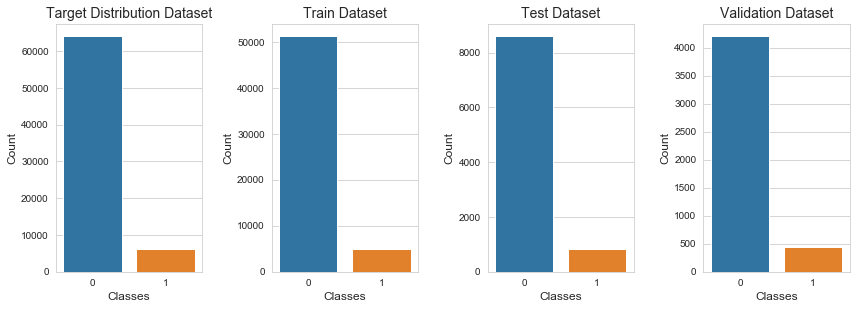

In [73]:
plt.figure(figsize=(12,16))

plt.subplot(441)
sns.countplot(df['readmitted'])
plt.title("Target Distribution Dataset", fontsize=14)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.subplot(442)
sns.countplot(train_df['readmitted'])
plt.title("Train Dataset", fontsize=14)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.subplot(443)
sns.countplot(test_df['readmitted'])
plt.title("Test Dataset", fontsize=14)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.subplot(444)
sns.countplot(validation_df['readmitted'])
plt.title("Validation Dataset", fontsize=14)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()

### Summary V - Data Partitioning 
* Partitioned data with no data leakage 
* The prevelance is similar is all partitioned

In [74]:
train_df.to_csv("train.csv", index=False)
test_df.to_csv("test.csv", index=False)
validation_df.to_csv("validation.csv", index=False)